# Geotables
First, we are going to include the libraries that we'll use

In [17]:
import geopandas
import pandas

Then, we are going to read the data file

In [3]:
gt_polygons = geopandas.read_file('countries_clean.gpkg')
gt_polygons.head()

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828...."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."


The ADMIN fiel column is using the Python str type, and the geometry field is encoded using a special class in Python that is used to represent geometric objects.
Every row and column have an index that identifies them uniquely and is renderered in bold on the left-hand side of the table.
This geographic table is an instance of the geopandas.GeoDataFrame object, used throughout Python's ecosystem to represent geographic data.
Geographic tables store grofraphic infgormation as an additional column. But, how is this information encoded?.
To see, we can check the type of tyhe object in the first row:

In [4]:
type(gt_polygons.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In geopandas, the geometry column has special traits which a "normal" column, such as ADMIN, does not.
When we plot the dataframe, the geometry column is used as the main shape to use in the plot

<Axes: >

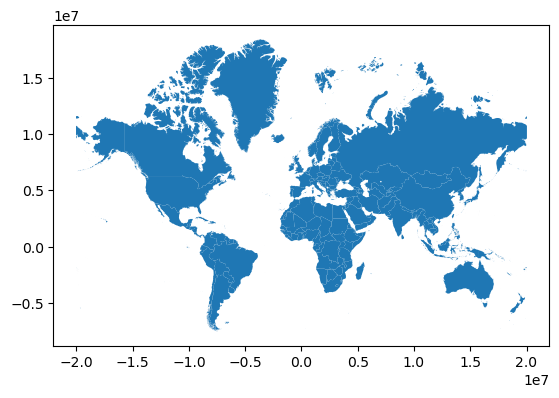

In [5]:
gt_polygons.plot()

Changing the geometric representaion of a sample must be donde carefully: since the geometery column is special, there are special functions to adjust the geometry.

If we wanted to represent each country using this centroid, a point in the middle of the shape, then we must take care to make sure that a new geometry column was set properly using the set_geometry() method.

This can be useful when yoy want to work with two different geometric representations of the same underlying sample.

For the next example, we are going to make a map of both the boundary and the centroid of a country.
First, to compute the centroid, we can use the gt_polygons.geometry.centroid property.

This gives us the poiunt that minimizes the average of distance from all other points on the boundary of the shape.
Storing that back to a column, called centroid:

In [6]:
gt_polygons['centroid'] = gt_polygons.geometry.centroid
# We have now a new feature
gt_polygons.head()

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-8277554.831 -1032942.536)


We can switch to the centroid column using the set_geometry() method.

Finally, we can plot the centroid and the bounday of each country after switching the geomtery column with set geometry():

<Axes: >

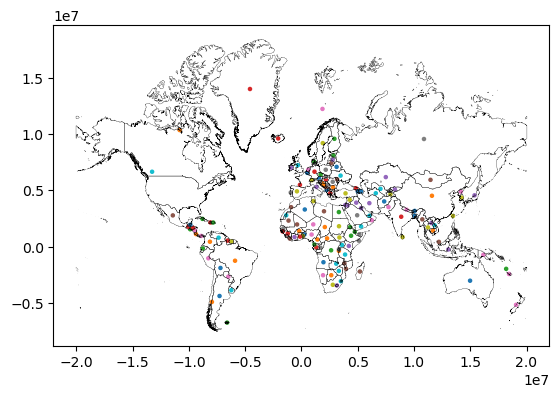

In [8]:
# Plot centroids
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)
# Plot polygons without color filling
gt_polygons.plot("ADMIN", ax=ax, facecolor="none", edgecolor="k", linewidth=0.2)

So, for instance, Bolivia is represented as a single polygon.

<Axes: >

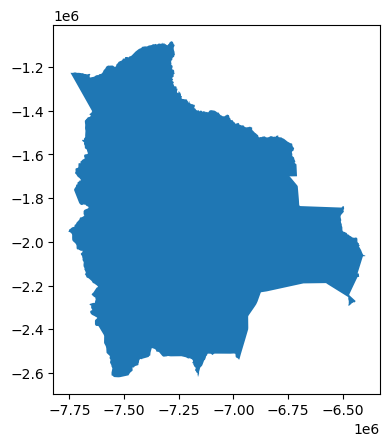

In [15]:
gt_polygons.query('ADMIN == "Bolivia"').plot()

While Indonesia is a MultiPolygon containing may Poligons for each individual island in the country.

<Axes: >

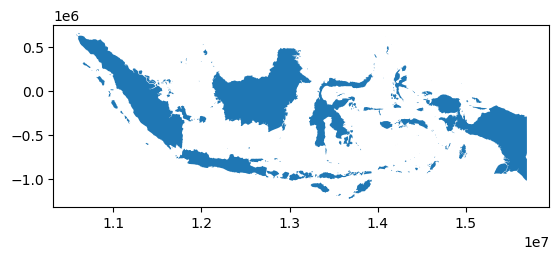

In [16]:
gt_polygons.query('ADMIN == "Indonesia"').plot()

As mentioned above, these are the simplest type of feature in that they do not have any dimension, only a pair of coordinates attached to them. This means that points can sometimes be stored in a non-geographic table, simply using one column for each coordinate. We find an example of this on the Tokyo dataset we will use.


In [18]:
gt_points = pandas.read_csv('tokyo_clean.csv')

Since we have read it with pandas, the table is loaded as a DataFrame, with no explicit spatial dimension.

In [19]:
type(gt_points)

pandas.core.frame.DataFrame

If we inspect the table, we find there is not a geometry column:

In [20]:
gt_points.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


Many points datasets are provided in this format. to make the most of them, it is conveninent to convert them into GeoDataFrame tables. There are two steps involved in this process. First, we turn the raw coordinates into geometries:

In [21]:
# We turn the raw coordinates into geometries
pt_geoms = geopandas.points_from_xy(x=gt_points["longitude"],y=gt_points["latitude"], crs="EPSG:4326")

Second, we create a GeoDataFrame object using these geometries:

In [22]:
gt_points = geopandas.GeoDataFrame(gt_points, geometry=pt_geoms)

And now gt_points looks and fells exactly like the one of countries we have seen before, with the difference the geometry column stores POINT geometries.

In [23]:
gt_points.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.70050 35.67400)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.70909)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06,POINT (139.76875 35.67152)
